## Blood Fat Prediction

In [1]:
import numpy as np

raw_data = np.genfromtxt('../data/x09.txt', skip_header=36)
raw_data

array([[  1.,   1.,  84.,  46., 354.],
       [  2.,   1.,  73.,  20., 190.],
       [  3.,   1.,  65.,  52., 405.],
       [  4.,   1.,  70.,  30., 263.],
       [  5.,   1.,  76.,  57., 451.],
       [  6.,   1.,  69.,  25., 302.],
       [  7.,   1.,  63.,  28., 288.],
       [  8.,   1.,  72.,  36., 385.],
       [  9.,   1.,  79.,  57., 402.],
       [ 10.,   1.,  75.,  44., 365.],
       [ 11.,   1.,  27.,  24., 209.],
       [ 12.,   1.,  89.,  31., 290.],
       [ 13.,   1.,  65.,  52., 346.],
       [ 14.,   1.,  57.,  23., 254.],
       [ 15.,   1.,  59.,  60., 395.],
       [ 16.,   1.,  69.,  48., 434.],
       [ 17.,   1.,  60.,  34., 220.],
       [ 18.,   1.,  79.,  51., 374.],
       [ 19.,   1.,  75.,  50., 308.],
       [ 20.,   1.,  82.,  34., 220.],
       [ 21.,   1.,  59.,  46., 311.],
       [ 22.,   1.,  67.,  23., 181.],
       [ 23.,   1.,  85.,  37., 274.],
       [ 24.,   1.,  55.,  40., 303.],
       [ 25.,   1.,  63.,  30., 244.]])

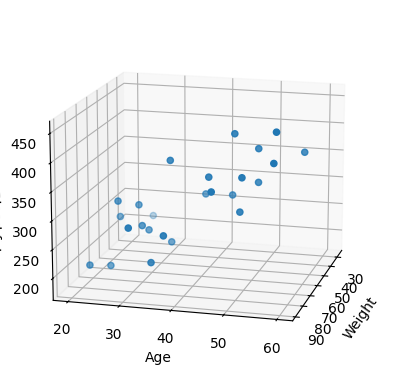

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

xs = np.array(raw_data[:,2], dtype=np.float32)
ys = np.array(raw_data[:,3], dtype=np.float32)
zs = np.array(raw_data[:,4], dtype=np.float32)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs)
ax.set_xlabel('Weight')
ax.set_ylabel('Age')
ax.set_zlabel('Blood fat')
ax.view_init(15,15)
plt.show()

In [3]:
x_data = np.array(raw_data[:,2:4], dtype=np.float32)
y_data = np.array(raw_data[:,4], dtype=np.float32)

y_data = y_data.reshape((25,1))

In [5]:
import tensorflow as tf
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())
tf.config.list_physical_devices('GPU')

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13617293221788399304
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4953669632
locality {
  bus_id: 1
  links {
  }
}
incarnation: 13243904049112452738
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2060, pci bus id: 0000:01:00.0, compute capability: 7.5"
xla_global_id: 416903419
]


I0000 00:00:1746772047.818417  113625 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1746772047.818807  113625 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1746772047.819011  113625 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1746772047.819249  113625 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_shape=(2, ))
])

model.compile(optimizer='rmsprop', loss='mse')

/home/kth/anaconda3/envs/dl_venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1746772136.166807  113625 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1746772136.167201  113625 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1746772136.167459  113625 cuda_exec

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

In [9]:
hist = model.fit(x_data, y_data, epochs=5000)

Epoch 1/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step - loss: 70762.7266
Epoch 2/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 70580.6562
Epoch 3/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 70448.7969
Epoch 4/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 70338.5234
Epoch 5/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 70240.7344
Epoch 6/5000


I0000 00:00:1746772268.870191  115983 service.cc:146] XLA service 0x7d19d80063e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1746772268.870209  115983 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 2060, Compute Capability 7.5
2025-05-09 15:31:08.884323: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-05-09 15:31:08.905232: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 90101
I0000 00:00:1746772268.978258  115983 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 70151.2188
Epoch 7/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 70067.5859
Epoch 8/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 69988.3984
Epoch 9/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 69912.6641
Epoch 10/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 69839.6797
Epoch 11/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 69768.9688
Epoch 12/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 69700.1094
Epoch 13/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 69632.8047
Epoch 14/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 69566.8281
Epoch 15/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 69501.9922
Epoch 16/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 69438.1328
Epoch 17/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 69375.1250
Epoch 18/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 69312.8516
Epoch 19/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 69251.2188
Epoch 20/5000
1/1 ━━━━━

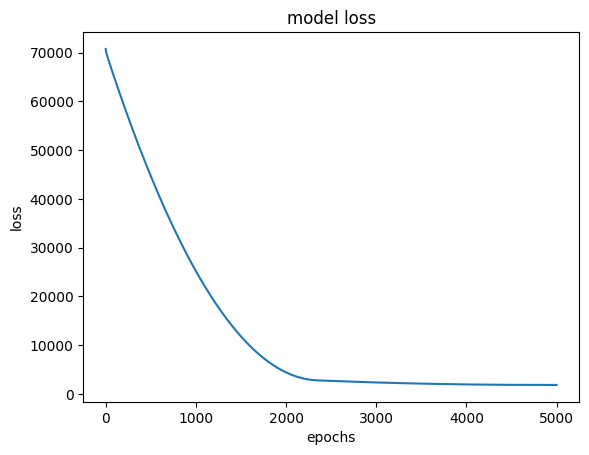

In [10]:
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()

In [11]:
model.predict(np.array([100,44]).reshape(1,2))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


array([[375.02042]], dtype=float32)

In [12]:
model.predict(np.array([60,25]).reshape(1,2))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


array([[219.1983]], dtype=float32)

In [13]:
W_, b_ = model.get_weights()
print('Weight is : ', W_)
print('bias is : ', b_)

Weight is :  [[1.2492261]
 [5.5712137]]
bias is :  [4.9643865]


In [14]:
x = np.linspace(20, 100, 50).reshape(50,1)
y = np.linspace(10, 70, 50).reshape(50,1)

X = np.concatenate((x, y), axis=1)
Z = np.matmul(X, W_) + b_

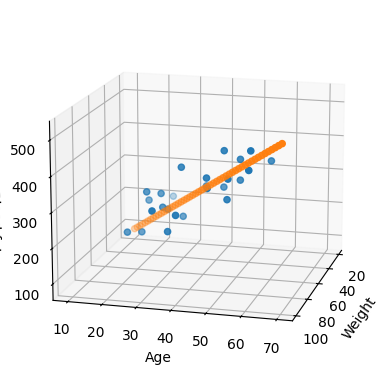

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs)
ax.scatter(x, y, Z)
ax.set_xlabel('Weight')
ax.set_ylabel('Age')
ax.set_zlabel('Blood fat')
ax.view_init(15,15)
plt.show()

## XOR Problem

In [16]:
import numpy as np

X = np.array([[0, 0],
              [1, 0],
              [0, 1],
              [1, 1]])
y = np.array([[0], [1], [1], [0]])

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(2, activation='sigmoid', input_shape=(2,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

/home/kth/anaconda3/envs/dl_venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), loss='mse')

In [20]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [21]:
hist = model.fit(X, y, epochs=5000, batch_size=1)

Epoch 1/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2278 
Epoch 2/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2659  
Epoch 3/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2653  
Epoch 4/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2354
Epoch 5/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2497  
Epoch 6/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2529 
Epoch 7/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2593 
Epoch 8/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2604  
Epoch 9/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2599  
Epoch 10/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2539  
Epoch 11/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step - loss: 0.2534
Epoch 12/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2589 
Epoch 13/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2604
Epoch 14/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2442  
Epoch 15/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step - loss: 0.25

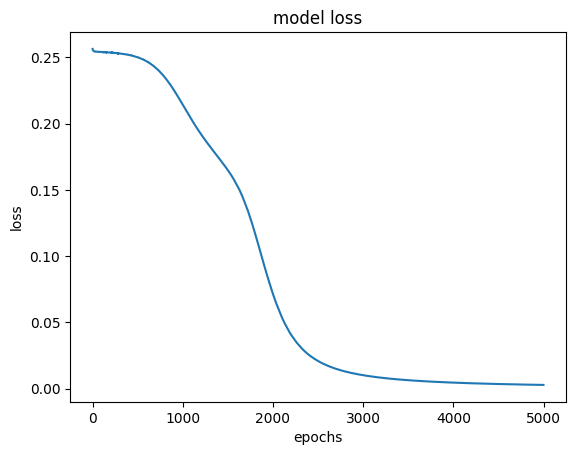

In [22]:
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()